In [56]:
#데준 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#과일 사진 데이터 불러오기 
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url)
#(샘플개수,너비,높이)인 3차원 배열을 (샘플 개수 너비x높이)크기로 변환
penguins_2d = penguins_df.values.reshape(-1, 100*100)

NameError: name 'penguins_df' is not defined

In [29]:
#KMeans 모델 사용 
#라이브러리 불러오기 
from sklearn.cluster import KMeans
#KMeans객체 생성(클러스터 수 3)
km = KMeans(n_clusters=3, random_state=42)

#학습
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [30]:
#레이블 확인
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
#0,1,2에 해당되는 샘플의 개수 확인 
np.unique(km.labels_,return_counts=True)


(array([0, 1, 2]), array([111,  98,  91], dtype=int64))

In [32]:
# 이미지 출력을 위한 함수 정의
import matplotlib.pyplot as plt

def draw_penguins(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수
    # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수. 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그린다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [38]:
draw_penguins(penguins[km.labels_ ==0])

NameError: name 'penguins' is not defined

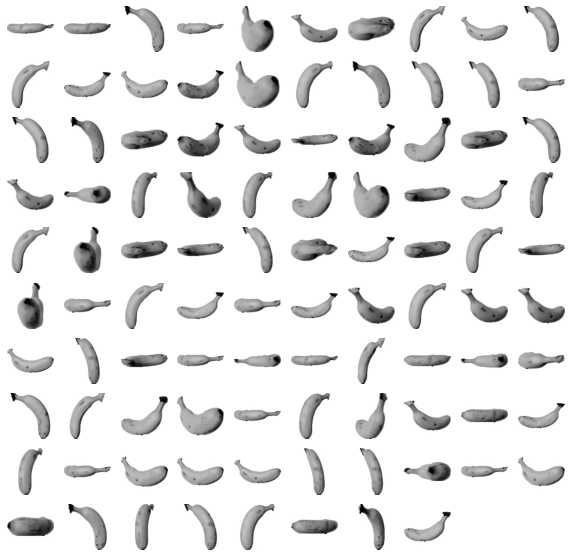

In [16]:
draw_fruits(fruits[km.labels_ == 1])

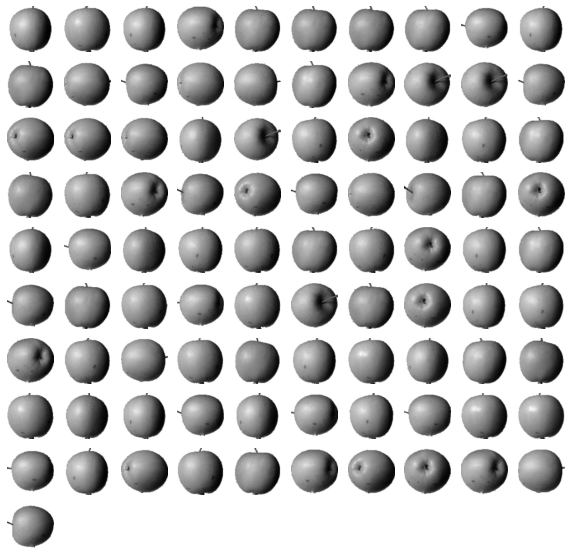

In [20]:
draw_fruits(fruits[km.labels_== 2])

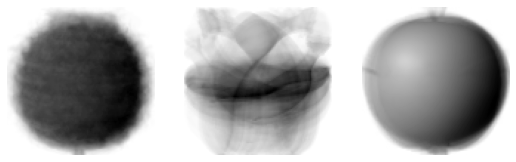

In [22]:
#2차원 배열로 변환하여 이미지 중심을 출력 
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [23]:
#훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해주는 transform() 사용
km.transform(fruits_2d[100:101])

array([[3393.8136117 , 8837.37750892, 5267.70439881]])

In [24]:
#예측
km.predict(fruits_2d[100:101])

array([0])

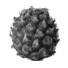

In [25]:
#예측한샘플이 맞는지 이미지로 출력하여 확인 
draw_fruits(fruits[100:101])

In [26]:
# 중심을 찾기위해 반복 수행한 횟수는 확인
km.n_iter_

4

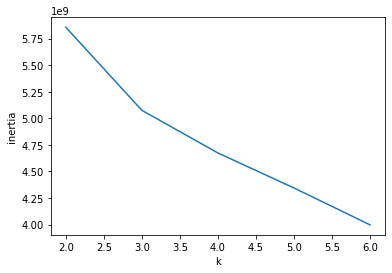

In [27]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

Generated 30 penguin images of size (64, 64).


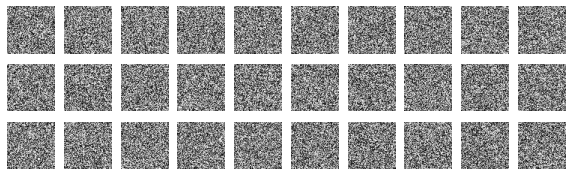

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'path/to/penguin/images'

In [35]:
import numpy as np

# 가상의 펭귄 이미지를 64x64 크기의 흑백 이미지로 생성
def create_fake_penguin_images(num_images=30, image_size=(64, 64)):
    images = np.random.randint(0, 256, size=(num_images, image_size[0], image_size[1]), dtype=np.uint8)
    return images

# 가상 이미지 데이터 생성
penguin_images = create_fake_penguin_images()

# 확인
print(f"Generated {len(penguin_images)} penguin images of size {penguin_images[0].shape}.")
# 이미지 시각화 함수 호출
draw_penguins(penguin_images, ratio=1)
from PIL import Image
import os

def load_penguin_images(directory, num_images=30, image_size=(64, 64)):
    image_files = os.listdir(directory)[:num_images]
    images = []
    for file in image_files:
        img = Image.open(os.path.join(directory, file)).convert('L')  # 흑백 변환
        img = img.resize(image_size)
        img_array = np.array(img)
        images.append(img_array)
    return np.array(images)

# 예제 경로 설정
image_directory = 'path/to/penguin/images'

# 실제 펭귄 이미지 불러오기
real_penguin_images = load_penguin_images(image_directory)

# 시각화
draw_penguins(real_penguin_images, ratio=1)


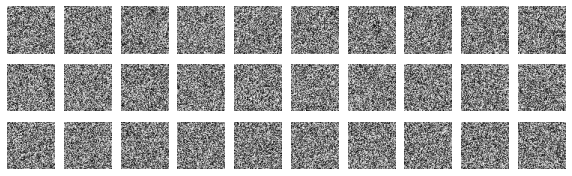

In [36]:
def create_fake_penguin_images(num_images=30, image_size=(64, 64)):
    images = np.random.randint(0, 256, size=(num_images, image_size[0], image_size[1]), dtype=np.uint8)
    return images

# 가상 이미지 데이터 생성
penguin_images = create_fake_penguin_images()

# 시각화
draw_penguins(penguin_images, ratio=1)

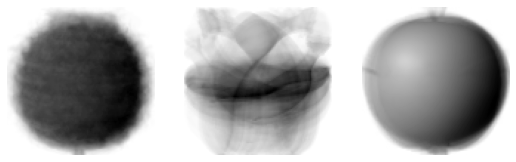

In [37]:
#2차원 배열로 변환하여 이미지 중심을 출력 
draw_penguins(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [57]:
# K-평균 모델 fitting
kmeans.fit(fruits_2d)

# 선택된 데이터 포인트를 KMeans 모델의 transform 메서드에 전달하여 각 클러스터 중심까지의 거리를 계산합니다.
distances = kmeans.transform(fruits_2d[100:101])

# 결과 출력
print("Distance to cluster centers:")
print(distances)

NameError: name 'penguin_2d' is not defined

In [60]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 데이터셋 로드
penguins = sns.load_dataset('penguins')

# 'species' 열(label) 제거
data = penguins.drop(columns=['species'])

# 결측치 처리
data.dropna(inplace=True)

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# K-means 클러스터링
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)

# 클러스터링 결과 확인
labels = kmeans.labels_
penguins['cluster'] = labels
print(penguins.head())


ValueError: could not convert string to float: 'Torgersen'

In [64]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# 레이블 제거
penguins_features = penguins_df.drop(columns=['species'])

# 데이터 스케일링
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_features)

# t-SNE를 사용하여 데이터를 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
penguins_2d = tsne.fit_transform(penguins_scaled)

# KMeans를 사용하여 군집 분석 수행
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(penguins_scaled)
cluster_labels = kmeans.labels_

# 군집 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(penguins_2d[:, 0], penguins_2d[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('t-SNE Visualization of Penguin Clusters (Labels Removed)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


NameError: name 'penguins_df' is not defined